# Diabetes Care
### Shan Wang
### 29 August, 2022

## 1 Loading and Exploring the Data Set

Let us first read the data set from the file.

In [1]:
import pandas as pd

quality = pd.read_csv('Diabetes.csv')
quality.info()
quality.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MemberID              131 non-null    int64  
 1   InpatientDays         131 non-null    int64  
 2   ERVisits              131 non-null    int64  
 3   OfficeVisits          131 non-null    int64  
 4   Narcotics             131 non-null    int64  
 5   DaysSinceLastERVisit  131 non-null    float64
 6   Pain                  131 non-null    int64  
 7   TotalVisits           131 non-null    int64  
 8   ProviderCount         131 non-null    int64  
 9   MedicalClaims         131 non-null    int64  
 10  ClaimLines            131 non-null    int64  
 11  StartedOnCombination  131 non-null    bool   
 12  AcuteDrugGapSmall     131 non-null    int64  
 13  PoorCare              131 non-null    int64  
dtypes: bool(1), float64(1), int64(12)
memory usage: 13.6 KB


,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


MemberID is the unique identifier that numbers patients from 1 to 131. InpatientDays is the number of inpatient visits or the number of days that the patient spent in the hospital. ERVisits is the number of times the patient visited the emergency room. OfficeVisits is the number of times that the patient visited any doctor’s office. Narcotics is the number of prescriptions that the patient had for narcotics. DaysSinceLastERVisit is the number of days between the patient’s last emergency room (ER) visit and the end of the study period, and it is set to the length of the study period if they never visited the ER. Pain is the number of visits for which the patient complained about pain. TotalVisits is the total number of times the patient visited any healthcare provider. ProviderCount is the number of providers that served the patient. MedicalClaims is the number of days on which the patient had a medical claim. ClaimLines is the total number of medical claims. StartedOnCombination is whether or not the patient was started on a combination of drugs to treat their diabetes. AcuteDrugGapSmall is the fraction of acute drugs that were refilled quickly after the prescription ran out. PoorCare is the dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.

We can see how many patients received poor care and how many patients received good care by using the `df.groupby` function.

In [2]:
quality['PoorCare'].value_counts()

0    98
1    33
Name: PoorCare, dtype: int64

The percentage of patients received poor care can be computed as follows.

In [3]:
import numpy as np

percPC = np.sum(quality['PoorCare'])/len(quality)
percPC

0.25190839694656486

You can see from the output of the `df.info()` function that the variable PoorCare is of `int` type, which stands for integer. By default, Python treats numbers in the data file according to the type that it was recorded. In this case, since PoorCare is recorded as 0 or 1 in the data file, it is treated as a numerical variable, in particular, an integer variable. For numerical variables, we can use the `df.describe()` function to take a look at some of its statistics.

In [4]:
quality['PoorCare'].describe()

count    131.000000
mean       0.251908
std        0.435775
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
Name: PoorCare, dtype: float64

However, in our case, PoorCare should be treated as a categorical variable, i.e., `categotical` data type in pandas. The type of variable will make a big difference in the way that Python handles the variable. We can convert its type to `categorical` using the following command.

In [5]:
quality['PoorCare'] = quality['PoorCare'].astype('category')
quality['PoorCare']

0      0
1      0
2      0
3      0
4      0
      ..
126    0
127    0
128    0
129    1
130    0
Name: PoorCare, Length: 131, dtype: category
Categories (2, int64): [0, 1]

Now, if we apply the `describe()` function on PoorCare, it will be handled differently. No statistics will be computed because it is not a number now. What you will see is count for each possible outcome, called categories in Python.

In [6]:
quality['PoorCare'].describe()

count     131
unique      2
top         0
freq       98
Name: PoorCare, dtype: int64

## 2 Baseline Model for Predicting Patients Receiving Good Care

The baseline model for such a classification problem is to just predict the most frequent outcome for all observations. Since good care is more common than poor care, we would predict that all patients are receiving good care, which gives us an accuracy of 74.81%.

## 3 Splitting the Data Set for Training and Testing

It is a good practice to train and test any models using different data sets as we have done before. In this case, we only have one data set, so the common practice is to randomly split the data set into a training set and a test set, where the test set is used to measure the out-of-sample accuracy of our model.

Now, let us use this package to randomly split our data into a training set and a test set. Since `sample` function randomly splits your data, it could split it differently for each of us. To make sure that we all get the same split, we can set our seed to the same number. The seed initializes the random number generator. This is important not only to make sure we all get the same results later but also to make it easier to check your work in the future. Otherwise, if you do not set the seed, everytime when you run your code and regenerate the results, you will get different numbers, which can make debugging and model improvement very challenging. We will use this feature again and again in this course and you will be very familiar with it.

In [7]:
from sklearn.model_selection import train_test_split

X = quality.loc[:,['OfficeVisits','Narcotics']] #这里只选两个变量只为了画图方便，实际上可以使用很多变量，但要注意进行变量的选择
y = quality['PoorCare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =10)

In [8]:
from sklearn.preprocessing import MinMaxScaler

#MinMax归一化：x’=(x-min(x))/(max(x)-min(x))
mm = MinMaxScaler()
scalerX = mm.fit(X_train) #scalerX相当于记录了min和max
X_train = scalerX.transform(X_train)
X_test= scalerX.transform(X_test)

In [9]:
y_train.value_counts()

0    66
1    25
Name: PoorCare, dtype: int64

In [10]:
y_test.value_counts()

0    32
1     8
Name: PoorCare, dtype: int64

## 4 Building an SVM Model

Now, we are ready to build a SVM model using OfficeVisits and Narcotics as independent variables, consistent with the Logistic Regression model.

Let us plot the `OfficeVisits` and `Narcotics` with `PoorCare`.

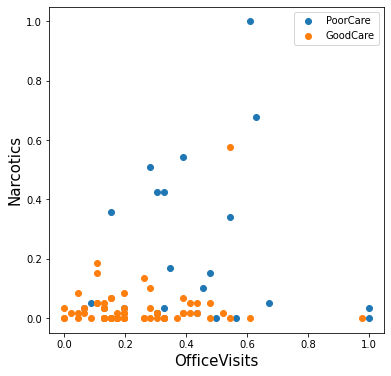

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6,6))
plt.scatter(X_train[np.where(y_train.values==1),0], X_train[np.where(y_train.values==1),1], label='PoorCare')
plt.scatter(X_train[np.where(y_train.values==0),0], X_train[np.where(y_train.values==0),1], label='GoodCare')
plt.legend()
plt.xlabel('OfficeVisits',fontdict={'size':15})
plt.ylabel('Narcotics',fontdict={'size':15})
plt.show()

To build SVM model, we need the package `svm`. Let us load it (import it by yourself).

In [12]:
from sklearn import svm

Function `svm.SVC` is used to fit a SVM model. Here we still use the formula: PoorCare ~ OfficeVisits + Narcotics. The first argument indicate the kernel function used to train the model, We first try the linear SVM; Argument `C` means the cost of constraints violation, which is the constant C in our PPT formualtion; Argument `shrinking=true(default)` means use of the shrinking heuristic method.

In [13]:
svm1=svm.SVC(kernel='linear', C=100) 
svm1.fit(X_train,y_train) 

SVC(C=100, kernel='linear')

List the support vectors by `clf.support_`:

In [14]:
svm1.support_

array([15, 18, 23, 32, 34, 35, 38, 45, 46, 47, 52, 54, 56, 57, 60, 66, 67,
       70, 76, 81, 87,  1,  2, 16, 24, 29, 30, 31, 33, 37, 39, 41, 43, 49,
       59, 71, 74, 75, 78, 80, 86], dtype=int32)

In [15]:
#number of support vectors for each class.
svm1.n_support_

array([21, 20], dtype=int32)

In [16]:
#绘制图形


#确定坐标轴范围
x1_min, x1_max = X_train[:,0].min(), X_train[:,0].max() #第0维特征的范围
x2_min, x2_max = X_train[:,1].min(), X_train[:,1].max() #第1维特征的范围

#生成网络采样点
x1,x2=np.mgrid[x1_min:x1_max:80j, x2_min:x2_max:80j ] 
grid_train=np.stack((x1.flat,x2.flat), axis=1) 

#预测网络采样点分类值
grid_hat = svm1.predict(grid_train) 

#调整为二维
grid_hat = grid_hat.reshape(x1.shape)  

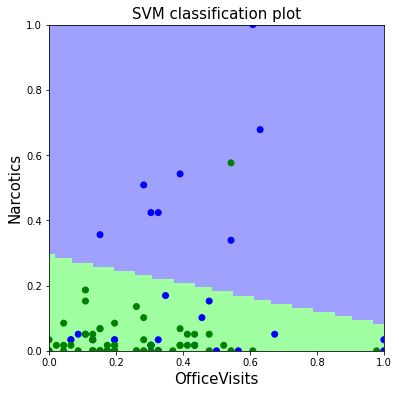

In [17]:
import matplotlib
#设置颜色
cm_light=matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark=matplotlib.colors.ListedColormap(['g','r','b'] )

plt.figure(figsize=(6,6))
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto')     # 预测值的显示
plt.scatter(X_train[:,0], X_train[:,1], c=y_train.values, cmap=cm_dark)  # 样本
plt.xlabel('OfficeVisits', fontsize=15)
plt.ylabel('Narcotics', fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('SVM classification plot', fontsize= 15)
plt.show()

### Cost Parameter
Let us change to a smaller value of the cost parameter:

In [18]:
svm2=svm.SVC(kernel='linear', C=1) 
svm2.fit(X_train,y_train)

SVC(C=1, kernel='linear')

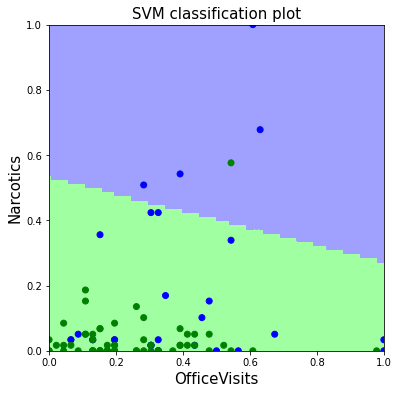

In [19]:
#绘制图形
grid_hat = svm2.predict(grid_train)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

plt.figure(figsize=(6,6))
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto')     # 预测值的显示
plt.scatter(X_train[:,0], X_train[:,1],c=y_train.values, cmap=cm_dark)  # 样本
plt.xlabel('OfficeVisits', fontsize=15)
plt.ylabel('Narcotics', fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('SVM classification plot', fontsize= 15)
plt.show()

Softer margin? Let us check the support vectors.

In [20]:
svm2.support_

array([15, 18, 23, 27, 32, 34, 35, 38, 45, 46, 47, 52, 54, 56, 57, 60, 65,
       66, 67, 70, 76, 77, 81, 85, 87,  1,  2,  6, 16, 20, 24, 29, 30, 31,
       33, 37, 39, 41, 43, 49, 59, 63, 71, 74, 75, 78, 80, 84, 86],
      dtype=int32)

In [21]:
svm2.n_support_

array([25, 24], dtype=int32)

We have more support vectors.

### Kernel
Let us change to a RBF kernel:

gamma can be regarded as the inverse of the sigma: exp(-gamma|x-z|^2)

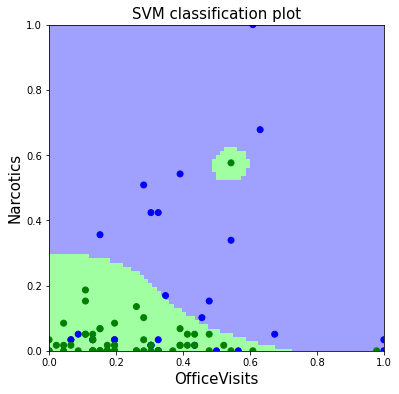

In [22]:
svm3=svm.SVC(kernel='rbf', C=100, gamma=5) 
svm3.fit(X_train,y_train)

#绘制图形
grid_hat = svm3.predict(grid_train)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

plt.figure(figsize=(6,6))
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto')     # 预测值的显示
plt.scatter(X_train[:,0], X_train[:,1],c=y_train.values, cmap=cm_dark)  # 样本
plt.xlabel('OfficeVisits', fontsize=15)
plt.ylabel('Narcotics', fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('SVM classification plot', fontsize= 15)
plt.show()

Let us change to a smaller value of the cost parameter:

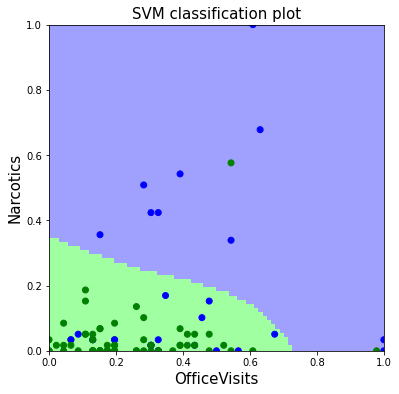

In [23]:
svm4=svm.SVC(kernel='rbf', C=1, gamma=5) 
svm4.fit(X_train,y_train)

#绘制图形
grid_hat = svm4.predict(grid_train)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

plt.figure(figsize=(6,6))
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto')     # 预测值的显示
plt.scatter(X_train[:,0], X_train[:,1],c=y_train.values, cmap=cm_dark)  # 样本
plt.xlabel('OfficeVisits', fontsize=15)
plt.ylabel('Narcotics', fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('SVM classification plot', fontsize= 15)
plt.show()

More on kernel and parameters can be found by `help(svm)`

## 8 In-Sample Cross Validation(SVM Model)

`GridSearchCV` function can help us tune the parameters like cost, kernel, gamma etc from a set of choices. It may take a lot of time.


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = [
        {'kernel': ['linear'], 'C': [0.5, 1, 10, 100]},
        {'kernel': ['poly'], 'C': [0.5, 1, 10, 100], 'degree': [2, 3]},
        {'kernel': ['rbf'], 'C': [0.5, 1, 10, 100], 'gamma':[ 5, 3, 1, 0.5, 0.3]}
        ]
svm_valid=GridSearchCV(svm.SVC(),parameters) #by default cv=3
svm_valid.fit(X_train,y_train)
print(svm_valid.best_estimator_)

SVC(C=10, kernel='linear')


Plot the best model:

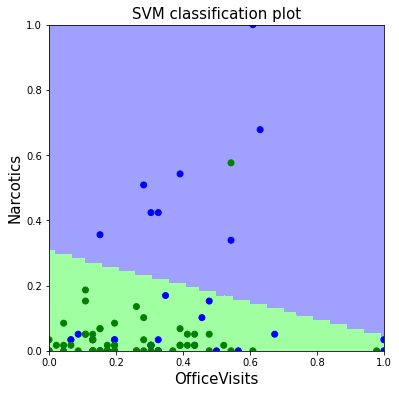

In [26]:
#绘制图形
grid_hat = svm_valid.predict(grid_train)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

plt.figure(figsize=(6,6))
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, shading='auto')     # 预测值的显示
plt.scatter(X_train[:,0], X_train[:,1],c=y_train.values, cmap=cm_dark)  # 样本
plt.xlabel('OfficeVisits', fontsize=15)
plt.ylabel('Narcotics', fontsize=15)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('SVM classification plot', fontsize= 15)
plt.show()

And we get the following confusion matrix with the best model.

In [27]:
predictTrain =svm_valid.predict(X_train)
conf1 = pd.crosstab(index = y_train,  
columns=predictTrain, colnames=['predictTrain'])
conf1

predictTrain,0,1
PoorCare,,
0,65,1
1,17,8


The in-sample accuracy is 73/91=80.22%.

## 9 Out-of-Sample Model Testing(SVM Model)

Similarly, we can perform the out-of-sample test for our model using the test data set. We firstly plot the data in test set:

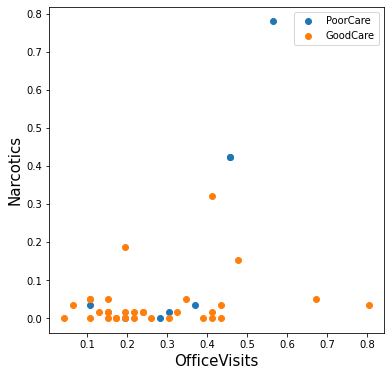

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(X_test[np.where(y_test.values==1),0], X_test[np.where(y_test.values==1),1], label='PoorCare')
plt.scatter(X_test[np.where(y_test.values==0),0], X_test[np.where(y_test.values==0),1], label='GoodCare')
plt.legend()
plt.xlabel('OfficeVisits',fontdict={'size':15})
plt.ylabel('Narcotics',fontdict={'size':15})
plt.show()

And we get the following confusion matrix with the best model for new prediction.

In [29]:
predictTest = svm_valid.predict(X_test)
conf2 = pd.crosstab(index = y_test,  
columns=predictTest, colnames=['predictTest'])
conf2

predictTest,0,1
PoorCare,,
0,31,1
1,5,3


The out-of-sample accuracy of the best model is 34/40=85%, which is higher than the logistic regression model (accuracy is 75% with threshold 0.3).